# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Python APIs Homework
# Georgia Tech Analytics Bootcamp Fall 2021
#
# Import dependencies and setup for the script
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
# import citipy for based on latitude and longitude
from citipy import citipy
import datetime
today = datetime.date.today()

# Import the API Keys Google and OpenWeather (blocked w/ gitignore)
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Use these ranges of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [26]:
# Make the lists for holding the latitude and longitudes per cities
lat_longs = []
cities = []

# To create a list of random cities with lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, lngs)

# Find and identify nearest city for each latitude, longitude combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# CHECKPOINT: Print the city count to confirm sufficient count
print(f'There is {len(cities)} cities in the list.')
print(f'It will take {round(len(cities)/60, 2)} minutes to connect to the servers in each city.')

There is 658 cities in the list.
It will take 10.97 minutes to connect to the servers in each city.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Get the number of sets needed in the for loop
total_set_number = (len(cities) // 50) + 1

# Set up the lists which will be used to create dataframe
date = []
city = []
country = []
max_temp = []
humidity = []
lat = []
lon = []
cloudiness = []
wind_speed = []

#Add a failed counter
failed_counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q="

# Gather weather information for each city
print('Getting data from site...')
print('------------------------------------------------')

# 
for set_counter in range(total_set_number):
    
    # Use try and except block: prevents the code from stopping when the set does not have 50 records
    try:    
        
        # For each record, OpenWeather API will pull the information and append to corresponding lists
        for record_counter in range(50):
            
            # Apply a counter to show the actual index the city is in the cities list 
            counter = set_counter * 50 + record_counter
            
            # CHECKPOINT
            # Print the current set and record index
            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {cities[counter]}')

            # Use try and except block: prevents the code from stopping when a city cannot be found
            try:
                
                # Get the query url and make a call
                query_url = url + cities[counter]
                weather_json = requests.get(query_url, time.sleep(1)).json()
                
             
                # Append to lists
                date.append(weather_json["dt"])
                city.append(cities[counter])
                country.append(weather_json["sys"]["country"])
                max_temp.append(weather_json["main"]["temp_max"])
                humidity.append(weather_json["main"]["humidity"])
                lat.append(weather_json["coord"]["lat"])
                lon.append(weather_json["coord"]["lon"])             
                cloudiness.append(weather_json["clouds"]["all"])
                wind_speed.append(weather_json["wind"]["speed"])
                              
                         
            # If the city is not found, print it out, and increment to the failed counter
            except KeyError:

                print('Oops!! The city not found. Skipping it...')
                failed_counter += 1
            
            # (For testing)If any other error, print it out
            except:
                
                print('Oh no! Unexpected Error')
    
    # Break out from the loop once the IndexError was found
    except IndexError:
        
        break
        
# Print out the number of cities found and not found
print('-----------------------------')
print(f'There are {failed_counter} cities not found. {len(cities) - failed_counter} cities in dataframe.')
print('The data has processed, complete.')      
print('-----------------------------')

Getting data from site...
------------------------------------------------
Processing Record 1 of Set 1 | meulaboh
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | wanaka
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | saraland
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | emilio carranza
Processing Record 10 of Set 1 | talavera
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | lasa
Processing Record 13 of Set 1 | turayf
Processing Record 14 of Set 1 | alta floresta
Processing Record 15 of Set 1 | umzimvubu
Oops!! The city not found. Skipping it...
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | sentyabrskiy
Oops!! The city not found. Skipping it...
Processing Record 18 of Set 1 | khonuu
Oops!! The city not found. Skipping it...
Processing Record 19 of Set 1 | rafraf
Processing Record 20 of Set 

Processing Record 33 of Set 4 | manado
Processing Record 34 of Set 4 | nelson bay
Processing Record 35 of Set 4 | kavieng
Processing Record 36 of Set 4 | naze
Processing Record 37 of Set 4 | tautira
Processing Record 38 of Set 4 | illoqqortoormiut
Oops!! The city not found. Skipping it...
Processing Record 39 of Set 4 | hermanus
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | dauphin
Processing Record 42 of Set 4 | little current
Processing Record 43 of Set 4 | kensington
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | nishihara
Processing Record 46 of Set 4 | acajutla
Processing Record 47 of Set 4 | bubaque
Processing Record 48 of Set 4 | vaitupu
Oops!! The city not found. Skipping it...
Processing Record 49 of Set 4 | tommot
Processing Record 50 of Set 4 | steamboat springs
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | madridejos
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | hamil

Processing Record 19 of Set 8 | mackenzie
Processing Record 20 of Set 8 | merauke
Processing Record 21 of Set 8 | attawapiskat
Oops!! The city not found. Skipping it...
Processing Record 22 of Set 8 | tiko
Processing Record 23 of Set 8 | laguna
Processing Record 24 of Set 8 | saldanha
Processing Record 25 of Set 8 | shelburne
Processing Record 26 of Set 8 | cockburn town
Processing Record 27 of Set 8 | mezen
Processing Record 28 of Set 8 | jadu
Processing Record 29 of Set 8 | yarada
Processing Record 30 of Set 8 | college
Processing Record 31 of Set 8 | ostrovnoy
Processing Record 32 of Set 8 | beloha
Processing Record 33 of Set 8 | halalo
Oops!! The city not found. Skipping it...
Processing Record 34 of Set 8 | bosaso
Processing Record 35 of Set 8 | muriwai beach
Processing Record 36 of Set 8 | araguacu
Processing Record 37 of Set 8 | vanavara
Processing Record 38 of Set 8 | tuktoyaktuk
Processing Record 39 of Set 8 | nola
Processing Record 40 of Set 8 | monrovia
Processing Record 41 

Oops!! The city not found. Skipping it...
Processing Record 5 of Set 12 | port hardy
Processing Record 6 of Set 12 | gardan diwal
Oops!! The city not found. Skipping it...
Processing Record 7 of Set 12 | ca mau
Processing Record 8 of Set 12 | mayor pablo lagerenza
Processing Record 9 of Set 12 | kahului
Processing Record 10 of Set 12 | dzilam gonzalez
Processing Record 11 of Set 12 | staraya poltavka
Processing Record 12 of Set 12 | port hedland
Processing Record 13 of Set 12 | bonoua
Processing Record 14 of Set 12 | nantucket
Processing Record 15 of Set 12 | leon
Processing Record 16 of Set 12 | tarkwa
Processing Record 17 of Set 12 | canaries
Processing Record 18 of Set 12 | waipawa
Processing Record 19 of Set 12 | worcester
Processing Record 20 of Set 12 | ambodifototra
Oops!! The city not found. Skipping it...
Processing Record 21 of Set 12 | baglung
Processing Record 22 of Set 12 | aqtobe
Processing Record 23 of Set 12 | le port
Processing Record 24 of Set 12 | sisimiut
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [88]:
# Create a DataFrame with the city information for below paramaters
city_dict = {'City': city,
             'Latitude': lat,
             'Lonitude': lon,
             'Max Temperature (°C)': max_temp,
             'Humidity (%)': humidity,
             'Cloudiness (%)': cloudiness,
             'Wind Speed (MPH)': wind_speed,
             'Country': country,
             'Date': date
            }
city_df = pd.DataFrame(city_dict)

# Import the DataFrame into the CSV file
csv_path = '../output_data/cities.csv'
city_df.to_csv(csv_path)

# Display DataFrame
city_df

,City,Latitude,Lonitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,meulaboh,4.1363,96.1285,26.86,80,100,1.28,ID,1627051550
1,esperance,-33.8667,121.9000,8.91,75,95,10.89,AU,1627051551
2,saskylakh,71.9167,114.0833,16.30,77,39,2.48,RU,1627051552
3,wanaka,-44.7000,169.1500,1.73,99,19,0.89,NZ,1627051554
4,vaini,-21.2000,-175.2000,24.09,94,75,2.06,TO,1627051555
...,...,...,...,...,...,...,...,...,...
604,xai-xai,-25.0519,33.6442,16.95,59,43,7.52,MZ,1627052379
605,apollonia,36.9716,24.7231,27.69,67,0,12.22,GR,1627052380
606,raub,3.7899,101.8570,24.98,84,94,0.99,MY,1627052381
607,baker city,44.7749,-117.8344,18.69,19,0,1.44,US,1627052383


In [89]:
# Provide statistical analysis on the DataFrame
city_df.describe()

,Latitude,Lonitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,6.090000e+02
mean,19.939239,19.832044,22.511117,66.732348,50.558292,3.870082,1.627052e+09
std,32.767124,89.223324,8.154735,22.009768,39.775029,2.897625,2.470707e+02
min,-54.800000,-175.200000,0.540000,8.000000,0.000000,0.000000,1.627051e+09
25%,-7.844700,-60.771800,17.030000,52.000000,6.000000,1.910000,1.627052e+09
50%,24.466700,21.548200,24.050000,72.000000,52.000000,3.090000,1.627052e+09
75%,46.433300,96.128500,28.140000,83.000000,90.000000,5.140000,1.627052e+09
max,78.218600,179.316700,45.080000,100.000000,100.000000,21.950000,1.627052e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [90]:
# Drop the rows of data that have a humidity higher than 100%
too_hum_city_df = city_df[city_df['Humidity (%)'] <= 100]
too_hum_city_df

if too_hum_city_df.size < 1:
    
    print('There are no cities with humidity higer than 100%')
    
else: too_hum_city_df
    


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

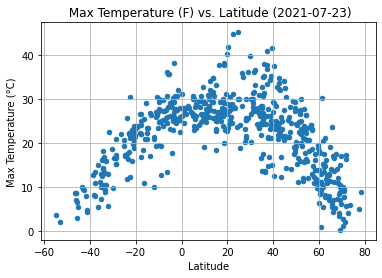

In [48]:
# Scatter Plot: Latitude and Max Temperature 
# Include Title and Date
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', 
                       title=f' Max Temperature (F) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_MaxTemperature_Plot.png')

## Latitude vs. Humidity Plot

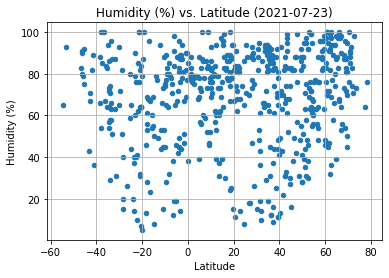

In [49]:
# Scatter PLot: Latitude and Humidity
# Include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
                       title=f'Humidity (%) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_Humidity_Plot.png')

## Latitude vs. Cloudiness Plot

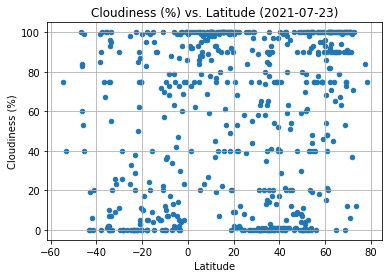

In [50]:
# Scatter Plot Latitude and Cloudiness
# Include the date in title 
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
                       title=f'Cloudiness (%) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_Cloudiness_Plot.png')

## Latitude vs. Wind Speed Plot

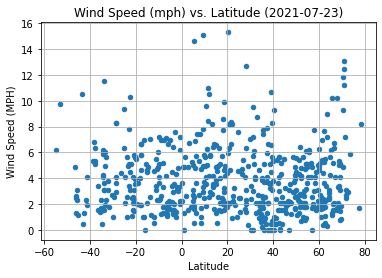

In [51]:
# Scatter Plot Latitude and Wind Speed
# Include the date in title 
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', 
                       title=f'Wind Speed (mph) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_WindSpeed_Plot.png')

## Linear Regression

In [38]:
# Create two DataFrame's determined by the latitude
north_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] >= 0]
south_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.4701496161579657
The linear regression model is y = -0.28x + 33.58


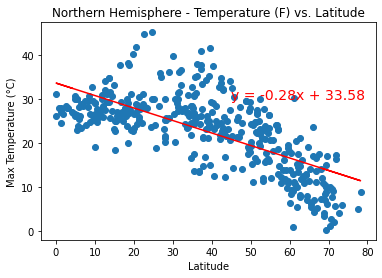

In [52]:
# Linear Regression Plot:  Latitude and Max temperature in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Northern Hemisphere - Temperature (F) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Max Temperature (°C)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Max Temperature (°C)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.7061005219269663
The linear regression model is y = 0.48x + 29.66


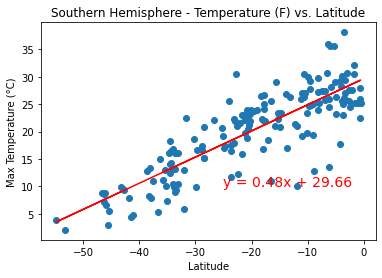

In [53]:
# Linear Regression Plot: Latitude and Max temperature in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Southern Hemisphere - Temperature (F) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Max Temperature (°C)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Max Temperature (°C)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.004362308504900066
The linear regression model is y = 0.07x + 67.73


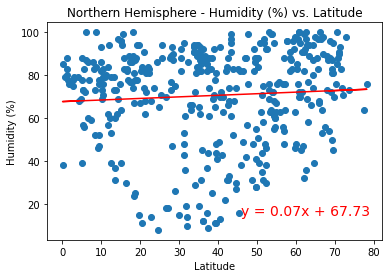

In [54]:
# Linear Regression Plot: Latitude and Humidity in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Northern Hemisphere - Humidity (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0067539837321874
The linear regression model is y = -0.15x + 61.35


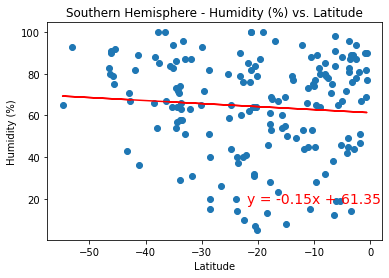

In [55]:
# Linear Regression Plot: Latitude and Humidity in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Southern Hemisphere - Humidity (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0015213212699799652
The linear regression model is y = -0.07x + 63.41


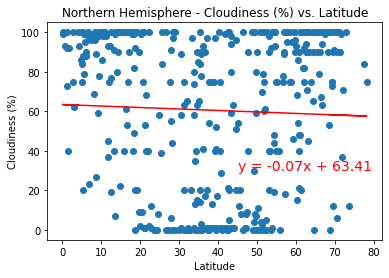

In [56]:
# Linear Regression Plot: Latitude and Cloudiness in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Northern Hemisphere - Cloudiness (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0013531872080611543
The linear regression model is y = 0.11x + 44.26


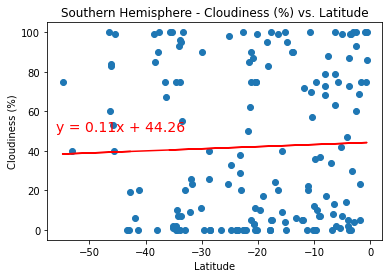

In [57]:
# Linear Regression Plot: Latitude and Cloudiness in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Southern Hemisphere - Cloudiness (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0036596701863338653
The linear regression model is y = -0.01x + 4.07


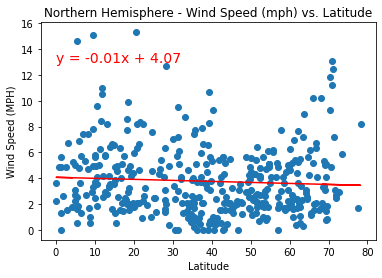

In [58]:
# Linear Regression Plot: Latitude and Wind Speed in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Northern Hemisphere - Wind Speed (mph) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.009258652161613349
The linear regression model is y = -0.02x + 3.44


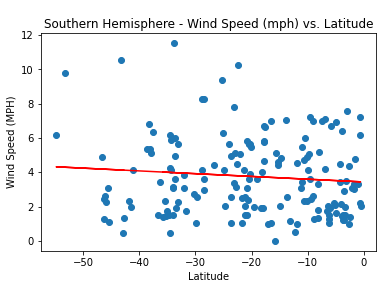

In [59]:
# Linear Regression Plot: Latitude and Wind Speed in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Southern Hemisphere - Wind Speed (mph) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')